In [69]:
import matplotlib.pyplot as plt
import numpy as np
import SegDataGenerator as gen
%matplotlib inline

import sys
sys.path.append("../unet/")
from my_utils import load_saved_data, plots
from SegDataGenerator import rgb2gray

batch_size = 5
data_path = '../data/dataset_fixed_256x256.npz'
model_path = 'model/'
steps_per_epoch=5
epochs=5
validation_step=2

In [6]:
trainGenerator = gen.SegDataGenerator(validation_split=0.2, width_shift_range=0.02,
                                   height_shift_range=0.02, zoom_range=0.1,
                                   horizontal_flip=True, vertical_flip=True,
                                   samplewise_center=False, samplewise_std_normalization=False,
                                   elastic_transform=False, rotation_right=False)
train_data = trainGenerator.flow_from_directory(data_path, subset='training', batch_size=batch_size,
                                               class_mode='segmentation', color_mode='rgb',
                                               use_contour=True, label_bw=True)


Reading from previously loaded data.
Found 535 images belonging to 2 classes.


TypeError: Invalid dimensions for image data

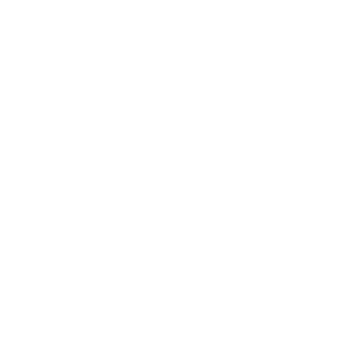

In [7]:
# use_contour
image, label = next(train_data);
seg = label['segmentation']
contour = label['contour']
plots([image, label])
# without contour
# image, seg = next(train_data)
# plots([image, seg])

In [74]:
def load_saved_data(data_path, image_size=(256, 256)):
    print('Reading from previously loaded data.')
    npzfile = np.load(data_path)
    return npzfile['X_train'], npzfile['Y_train'], npzfile['C_train'], npzfile['W_train'], npzfile['X_test']

X_train, Y_train, C_train, W_train, X_test = load_saved_data(data_path, image_size=(256, 256))

Reading from previously loaded data.


In [75]:
# RGB to gray, if needed
X_train_gray = np.zeros((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test_gray = np.zeros((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
for i in range(X_train.shape[0]):
    X_train_gray[i,:,:,:] = rgb2gray(X_train[i,:,:,:])
for i in range(X_test.shape[0]):
    X_test_gray[i,:,:,:] = rgb2gray(X_test[i,:,:,:])    
X_train = X_train_gray
X_test = X_test_gray

In [76]:
# Kazu tests

trainGenerator = gen.SegDataGenerator(horizontal_flip=False, vertical_flip=False,
                                   featurewise_center=True, featurewise_std_normalization=True,
                                   elastic_transform=False, rotation_right=False)

# trainGenerator = gen.SegDataGenerator(validation_split=0.2, width_shift_range=0.02,
#                                    height_shift_range=0.02, zoom_range=0.1,
#                                    horizontal_flip=True, vertical_flip=True,
#                                    featurewise_center=False, featurewise_std_normalization=False,
#                                    elastic_transform=True, rotation_right=True)

trainGenerator.fit(X_train)

train_data = trainGenerator.flow_from_directory(data_path, subset='training', batch_size=batch_size,
                                               class_mode='segmentation', color_mode='grayscale',
                                               use_weights=True, label_bw=True)
# val_data = trainGenerator.flow_from_directory(data_path, subset='validation', batch_size=batch_size,
#                                               class_mode='segmentation', color_mode='rgb', 
#                                               use_weights=True, label_bw=True)

Reading from previously loaded data.
Found 530 images belonging to 2 classes.


(5, 256, 256, 1) (5, 256, 256, 2)


(-0.64431083, 0.72119665)

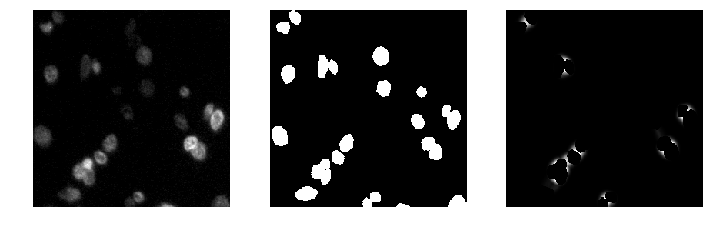

In [79]:
images, labels = next(train_data)
# images, labels = next(val_data)
print(images.shape, labels.shape)
plots([images[0], labels[0][:, :, 0], labels[0][:, :, 1]])
img = images[0]
weights = labels[0][:, :, 1]
# np.min(weights), np.mean(weights), np.median(weights), np.max(weights)
np.min(img), np.max(img)